In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[800.0, 1600.0, 3200.0, 6400.0, 12800.0, 25600.0, 51200.0, 102400.0, 204800.0]


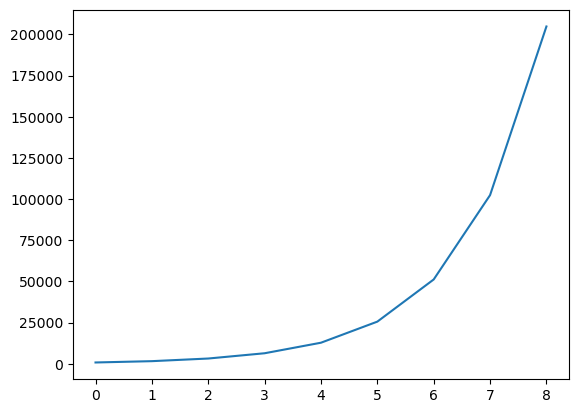

In [8]:
n_sys = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
diameters = [400/(2*sys) for sys in n_sys]
chain_times = [sys*400/4 for sys, diameter in zip(n_sys, diameters)]
print(chain_times)
plt.plot(chain_times)

190.63064251131075 0.005767355409719938


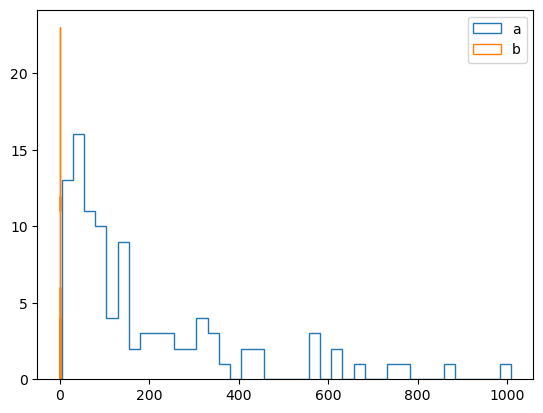

In [27]:
lam = 190
a = [np.random.exponential(lam) for i in range(100)]
b = [np.random.exponential(1/lam) for i in range(100)]

print(np.mean(a), np.mean(b))
plt.hist(a, 40, histtype="step", label="a")
plt.hist(b, 40, histtype="step", label="b")
plt.legend()

In [35]:
df_c1 = pd.read_csv("../../ecmc_ff_16_c-1.csv")
df_c2 = pd.read_csv("../../ecmc_ff_16_c-2.csv")

#c2 is long chain time for first sweep
c1_events = np.array(df_c1["events"].to_list())
c2_events = np.array(df_c2["events"].to_list())

print(np.mean(c1_events[:4]), np.mean(c2_events[:4]))

37.35 76.3


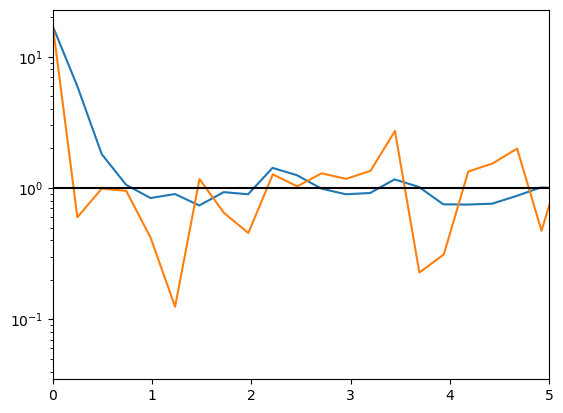

In [54]:
df_c3 = pd.read_csv("../cpp-monte-carlo-simulations/var_runs/16/ecmc_ff_sf_10m-16-1.csv")
df_c4 = pd.read_csv("../../ecmc_ff_16_base-2.csv")

c3_events = np.array(df_c3["events"].to_list())
c4_events = np.array(df_c4["events"].to_list())

c3_varm = np.array(df_c3["var_mix"].to_list())
c4_varm = np.array(df_c4["var_mix"].to_list())

eff_x = np.linspace(0, 100000, 100000)*np.mean(c3_events)/16
eff_x_base = np.linspace(0, 50000, 50000)*np.mean(c4_events)/16

var_equil_16 = (400-16*(400/(2*16)))**2/(4*(16+1))

plt.plot(eff_x_base[:2000]/16, c4_varm[:2000]/var_equil_16, label="base")
plt.plot(eff_x[:2000]/16, c3_varm[:2000]/var_equil_16, label="test")

plt.xlim(0, 5)
plt.hlines(1, 0, 10, "black")
plt.yscale('log')